In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf # version 2.17.1
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE =32
CHANNELS = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Model_1_cancer_normal_infection",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4899 files belonging to 3 classes.


In [ ]:
class_name = dataset.class_names
class_name

['Cancer', 'Infectieux', 'Normal']

In [ ]:
import os

# Chemins des sous-dossiers
normal_folder = "/content/drive/MyDrive/Model_1_cancer_normal_infection/Normal"
infectieux_folder = "/content/drive/MyDrive/Model_1_cancer_normal_infection/Infectieux"
cancer_folder = "/content/drive/MyDrive/Model_1_cancer_normal_infection/Cancer"

# Fonction pour compter les fichiers dans un dossier
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Compter les images dans chaque sous-dossier
normal_count = count_images(normal_folder)
infectieux_count = count_images(infectieux_folder)
cancer_count = count_images(cancer_folder)

# Afficher le nombre d'images dans chaque dossier
print(f"Nombre d'images dans le dossier 'normal' : {normal_count}")
print(f"Nombre d'images dans le dossier 'infectieux' : {infectieux_count}")
print(f"Nombre d'images dans le dossier 'cancer' : {cancer_count}")


Nombre d'images dans le dossier 'normal' : 1574
Nombre d'images dans le dossier 'infectieux' : 1866
Nombre d'images dans le dossier 'infectieux' : 1459


In [ ]:
import os
import shutil
import random

# Chemins source et cible
source_dir = "/content/drive/MyDrive/Model_1_cancer_normal_infection"
target_dir = "/content/drive/MyDrive/model_1_dataset_structure"

# Crée le dossier cible s'il n'existe pas
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Limite d'images par classe
limit_per_class = 1400

for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)
    if os.path.isdir(class_dir):
        # Filtrer les fichiers pour ne prendre que les images valides (ex : extensions courantes)
        images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

        # Vérifie qu'il y a des images dans la classe
        if not images:
            print(f"Aucune image trouvée dans la classe : {class_name}")
            continue

        # Sélectionner aléatoirement jusqu'à 1400 images
        selected_images = random.sample(images, min(len(images), limit_per_class))

        # Crée le dossier de la classe cible
        target_class_dir = os.path.join(target_dir, class_name)
        os.makedirs(target_class_dir, exist_ok=True)

        # Copier les images sélectionnées
        for image_name in selected_images:
            source_path = os.path.join(class_dir, image_name)
            target_path = os.path.join(target_class_dir, image_name)
            try:
                shutil.copy(source_path, target_path)
            except Exception as e:
                print(f"Erreur lors de la copie de {source_path} vers {target_path} : {e}")

print("Copie des images terminée.")


Copie des images terminée.


In [ ]:
import os

# Chemins des sous-dossiers
normal_folder = "/content/drive/MyDrive/model_1_dataset_structure/Normal"
infectieux_folder = "/content/drive/MyDrive/model_1_dataset_structure/Infectieux"
cancer_folder = "/content/drive/MyDrive/model_1_dataset_structure/Cancer"

# Fonction pour compter les fichiers dans un dossier
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Compter les images dans chaque sous-dossier
normal_count = count_images(normal_folder)
cancer_count = count_images(cancer_folder)
infectieux_count = count_images(infectieux_folder)

# Afficher le nombre d'images dans chaque dossier
print(f"Nombre d'images dans le dossier 'normal' : {normal_count}")
print(f"Nombre d'images dans le dossier 'infectieux' : {infectieux_count}")
print(f"Nombre d'images dans le dossier 'cancer' : {cancer_count}")


Nombre d'images dans le dossier 'normal' : 1400
Nombre d'images dans le dossier 'infectieux' : 1400
Nombre d'images dans le dossier 'cancer' : 1400


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/model_1_dataset_structure",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4200 files belonging to 3 classes.


In [ ]:
class_name = dataset.class_names
class_name

['Cancer', 'Infectieux', 'Normal']

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 1 2 0 2 1 1 2 2 0 2 1 0 2 0 1 1 2 2 2 2 1 0 0 1 0 2 1 0]


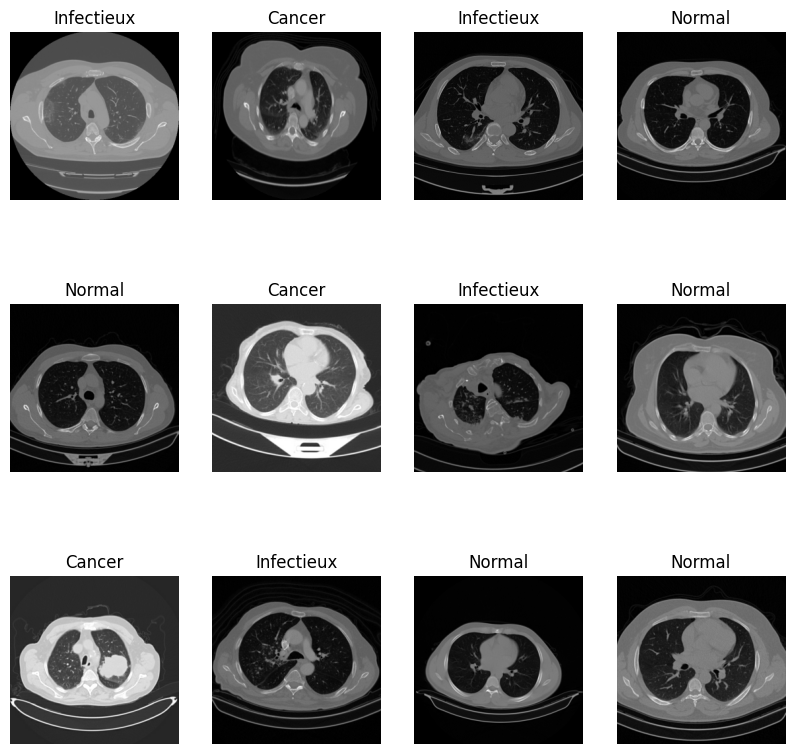

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        ax.imshow(image_batch[i].numpy().astype('uint8'))
        ax.set_title(class_name[label_batch[i].numpy()])
        ax.axis("off")
plt.show()


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

105

In [ ]:
len(val_ds)

13

In [ ]:
len(test_ds)

14

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom(0.1),
    #layers.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 100,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 83s 466ms/step - accuracy: 0.4771 - loss: 1.6544 - val_accuracy: 0.7019 - val_loss: 0.6827
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.7287 - loss: 0.5968 - val_accuracy: 0.7428 - val_loss: 0.5933
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.7823 - loss: 0.4886 - val_accuracy: 0.8005 - val_loss: 0.4625
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8018 - loss: 0.4304 - val_accuracy: 0.8341 - val_loss: 0.3895
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.8159 - loss: 0.4176 - val_accuracy: 0.8462 - val_loss: 0.3614
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.8350 - loss: 0.3779 - val_accuracy: 0.8365 - val_loss: 0.3717
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.8400 - loss: 0.3687 - val_accuracy: 0.8389 - val_loss: 0.3968
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8564 - loss: 0.32

In [ ]:
model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9756 - loss: 0.0928


[0.07349485903978348, 0.96875]

In [ ]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


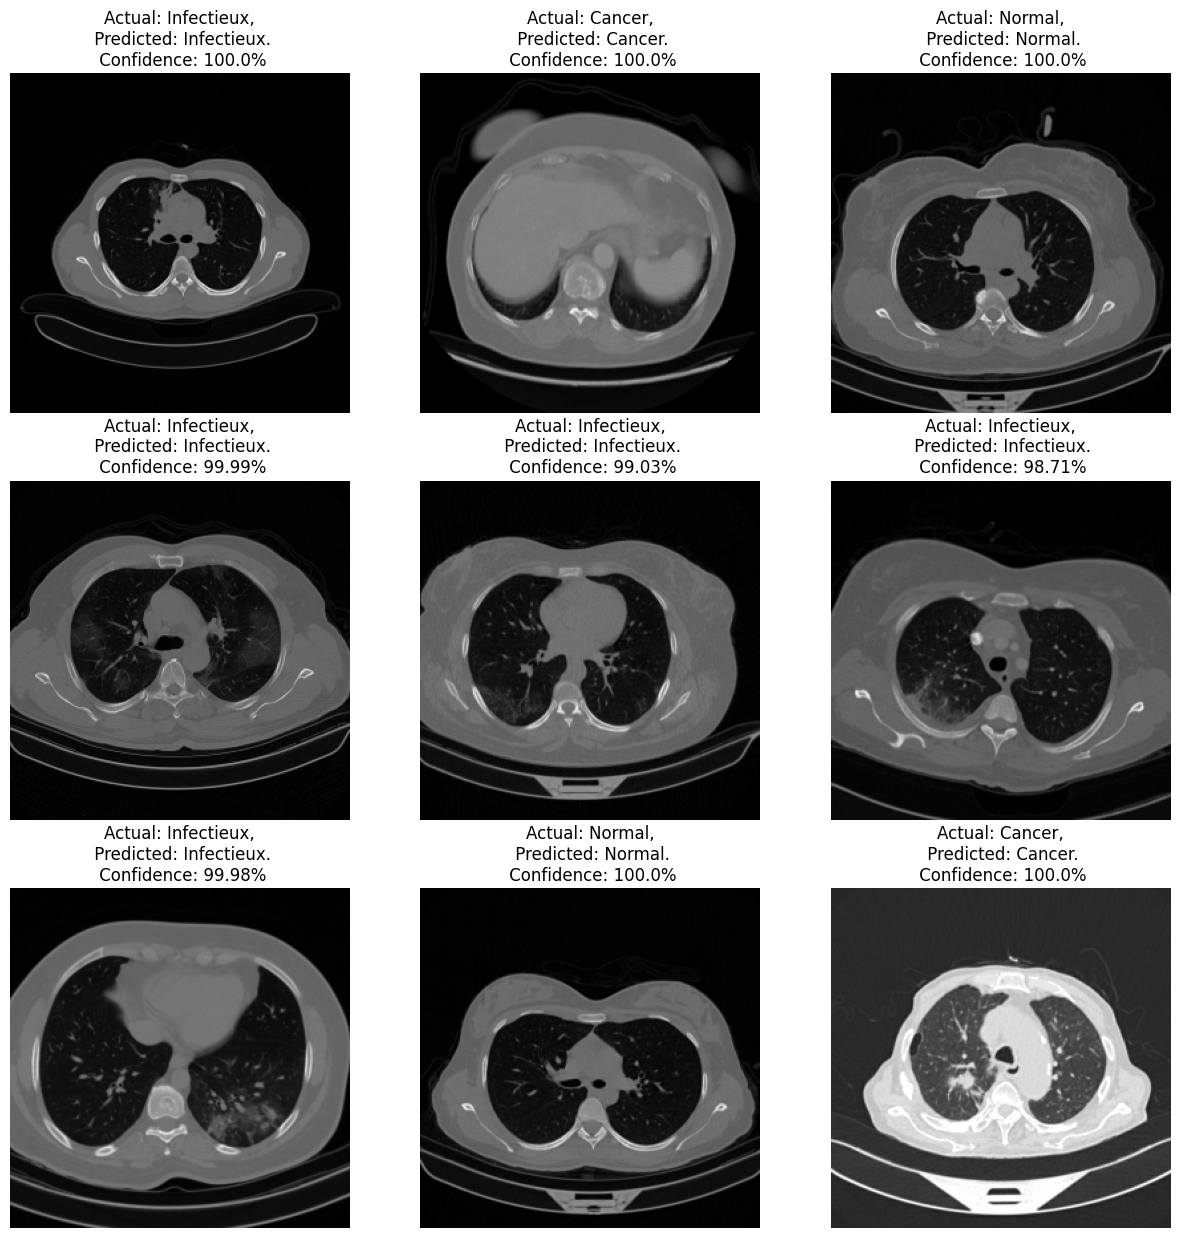

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
def predict_single(model, img, class_name):
    # Convertir l'image en tableau numpy et ajouter une dimension
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Ajouter une dimension (batch)

    # Faire des prédictions
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


In [ ]:
def predict_dataset(model, dataset, class_names):
    y_true = []
    y_pred = []

    # Parcourir le dataset pour faire des prédictions
    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        y_pred.extend(predicted_classes)
        y_true.extend(labels.numpy())  # Ajouter les étiquettes vraies

    return np.array(y_true), np.array(y_pred)


In [ ]:
from sklearn.metrics import classification_report

# Prédire sur le dataset de test
y_true, y_pred = predict_dataset(model, test_ds, class_name)

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_name)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
              precision    recall  f1-score   support

      Cancer       0.99      0.98      0.99       145
  Infectieux       0.96      0.98      0.97       165
      Normal       0.96      0.94      0.95       138

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 100,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 240s 335ms/step - accuracy: 0.5001 - loss: 1.1383 - val_accuracy: 0.7668 - val_loss: 0.5319
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.7779 - loss: 0.4819 - val_accuracy: 0.8173 - val_loss: 0.4859
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.8106 - loss: 0.4325 - val_accuracy: 0.8317 - val_loss: 0.4104
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.8566 - loss: 0.3439 - val_accuracy: 0.8269 - val_loss: 0.3958
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.8763 - loss: 0.3035 - val_accuracy: 0.8870 - val_loss: 0.2834
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.8837 - loss: 0.2854 - val_accuracy: 0.9135 - val_loss: 0.2669
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9028 - loss: 0.2340 - val_accuracy: 0.8918 - val_loss: 0.2442
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9047 - loss: 0.

In [ ]:
model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9902 - loss: 0.0394


[0.033862944692373276, 0.9910714030265808]

In [ ]:
#model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9875 - loss: 0.0293


[0.07006277143955231, 0.9821428656578064]

In [ ]:
from sklearn.metrics import classification_report

# Prédire sur le dataset de test
y_true, y_pred = predict_dataset(model, test_ds, class_name)

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_name)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

      Cancer       0.99      0.99      0.99       142
  Infectieux       0.99      0.99      0.99       164
      Normal       0.99      0.99      0.99       142

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448



In [ ]:
model.save("/content/drive/MyDrive/CT_model_1_v2.keras")

In [ ]:
model.export("/content/drive/MyDrive/CT_model_1_v2")

Saved artifact at '/content/drive/MyDrive/CT_model_1_v2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139845478746416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845478756096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845504264400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845392493104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139847690228256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845478258064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845504265456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845392753136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845392755600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845392753312: TensorSpec(shape=(), dtype=tf.resource, name=No

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


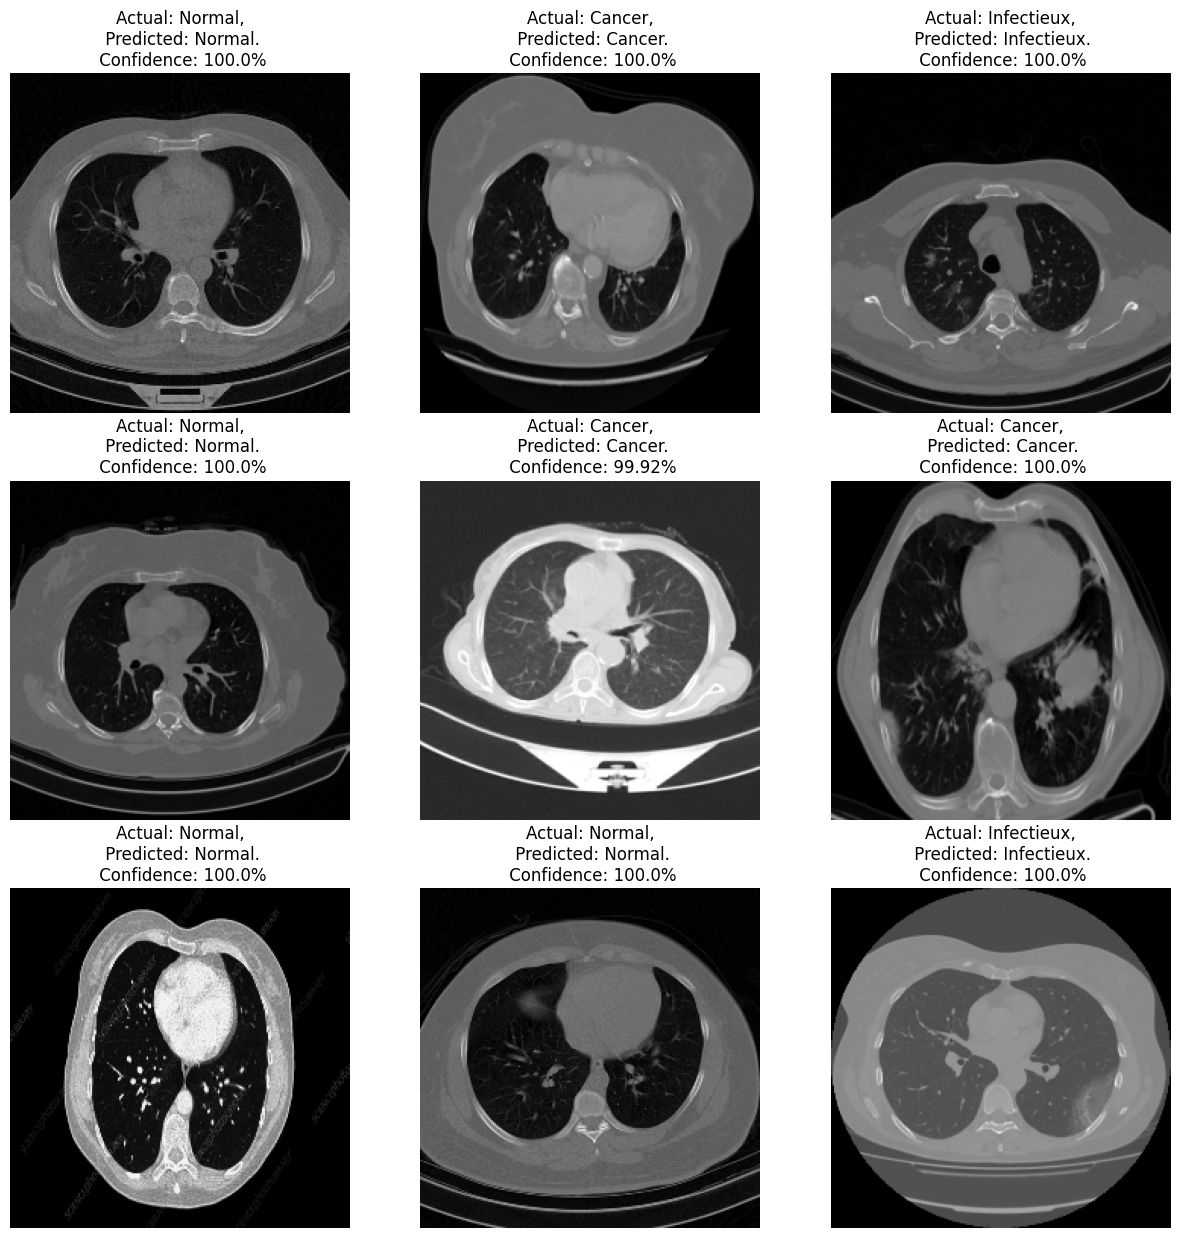

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import tensorflow as tf # Import tensorflow
#model = load_model("/content/drive/MyDrive/CT_model_1.keras")

plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
img_path = '/content/000046.png'
img = tf.keras.utils.load_img(img_path)
predict_single(model, img, class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


('Cancer', 100.0)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import tensorflow as tf # Import tensorflow
model = load_model("/content/drive/MyDrive/Brain_model.keras")

In [ ]:
#model.save("/content/drive/MyDrive/Brain_model.h5")
# Sauvegarder l'architecture en JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Brain_model.json", "w") as json_file:
    json_file.write(model_json)

# Sauvegarder uniquement les poids au format HDF5
model.save_weights("/content/drive/MyDrive/Brain_model_weights.weights.h5")

print("L'architecture et les poids du modèle ont été sauvegardés.")



L'architecture et les poids du modèle ont été sauvegardés.


In [ ]:
from tensorflow.keras.models import model_from_json

# Charger l'architecture depuis le fichier JSON
with open("/content/drive/MyDrive/Brain_model.json", "r") as json_file:
    loaded_model = model_from_json(json_file.read())

# Charger les poids
loaded_model.load_weights("/content/drive/MyDrive/Brain_model_weights.weights.h5")

print("Modèle reconstruit avec succès.")


Modèle reconstruit avec succès.


In [ ]:
class_name = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
img_path = '/content/Te-pi_0025.jpg'
img = tf.keras.utils.load_img(img_path)
predict_single(model, img, class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


('pituitary_tumor', 100.0)

In [ ]:

# Fonction de redimensionnement et de mise à l'échelle
def preprocess_image(img_path, target_size):
    # Charger l'image
    img = tf.keras.utils.load_img(img_path)

    # Convertir en tableau NumPy
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Redimensionner
    img_array = tf.image.resize(img_array, (target_size, target_size))

    # Mettre à l'échelle entre 0 et 1
    img_array = img_array / 255.0

    return img_array

# Fonction de prédiction
def predict_single(model, img_path, class_name):
    # Prétraiter l'image
    img_array = preprocess_image(img_path, IMAGE_SIZE)

    # Ajouter une dimension batch
    img_array = tf.expand_dims(img_array, 0)

    # Faire la prédiction
    prediction = model.predict(img_array)

    # Identifier la classe prédite et la confiance
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_name[predicted_class_index]
    confidence = round(100 * (np.max(prediction)), 3)  # Confiance en pourcentage

    print(f"Prediction pour l'image {img_path}: {predicted_class} avec une confiance de {confidence}%.")

    return predicted_class, confidence

# Prédire une image
predict_single(model, '/content/hh.png', class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Prediction pour l'image /content/hh.png: Normal avec une confiance de 100.0%.


('Normal', 100.0)